# Câu 3: Eigenfaces
- Sử dụng bộ dữ liệu các khuôn mặt  sklearn.datasets.fetch_lfw_people, lấy min_faces_per_person = 60
- Áp dụng PCA chúng ta sẽ giảm chiều dữ liệu còn 150 chiều (gốc là ~3000 chiều)
- Trực quan hóa dữ liệu gốc và sau khi giảm chiều.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import fetch_lfw_people


In [4]:
faces = fetch_lfw_people(min_faces_per_person=60)
type(faces)

c:\python36\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


sklearn.utils.Bunch

In [5]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [6]:
faces.images[0].shape

(62, 47)

In [8]:
faces.data[0].size

2914

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(150)
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca.explained_variance_ratio_

array([0.18776795, 0.14548898, 0.07103542, 0.06026749, 0.0504076 ,
       0.02936599, 0.02470627, 0.02047527, 0.01968445, 0.0189178 ,
       0.01560987, 0.01470454, 0.0121407 , 0.01095571, 0.01042816,
       0.00972051, 0.00906779, 0.00876521, 0.00813087, 0.00705089,
       0.00682341, 0.00648109, 0.00603545, 0.00578568, 0.00532363,
       0.00520648, 0.00500154, 0.00476372, 0.0045244 , 0.00425309,
       0.00405167, 0.00380145, 0.00360033, 0.00350987, 0.00347687,
       0.00324892, 0.00314407, 0.00310621, 0.00307643, 0.00290166,
       0.00282753, 0.0027487 , 0.00272782, 0.00259985, 0.00246388,
       0.00238214, 0.0023496 , 0.00231576, 0.00227235, 0.00221907,
       0.00210642, 0.00205901, 0.00202986, 0.00200763, 0.00195911,
       0.00195431, 0.00188171, 0.00182909, 0.00176752, 0.00175944,
       0.00174918, 0.00166451, 0.00161346, 0.00158637, 0.0015662 ,
       0.00152925, 0.00149928, 0.00146113, 0.0014524 , 0.00141118,
       0.00140531, 0.00136441, 0.0013622 , 0.00131673, 0.00129

In [13]:
x = sum(pca.explained_variance_ratio_)
x

0.9456658019917086

In [14]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

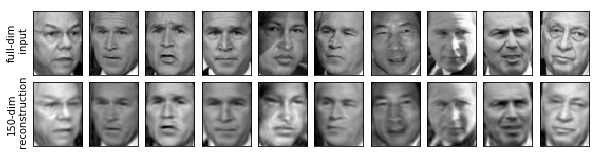

In [15]:
#plot the result
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                      subplot_kw={'xticks':[], 'yticks': []},
                      gridspec_kw = dict(hspace = 0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
ax[0,0].set_ylabel('full-dim\n input')
ax[1,0].set_ylabel('150-dim\n reconstruction')
plt.show()
